In [905]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [906]:
data = pd.read_csv('loan.csv')
metadata = pd.read_excel('Data_Dictionary.xlsx')
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [907]:
data.shape

(39717, 111)

# Data Cleaning
```
1. Null data
    -> Remove Data
    -> Impute Data
2. Fix data types
3. Duplicate Data
4. Drop un-useful columns like ID
```

In [908]:
# finding no of rows with all na data
data.isna().all(axis = 0).sum()

54

In [909]:
# there are columns with all na values or just single value these would not add any value in anylasis and can be dropped, also those columns which have unique values for all columns would also not add any value to anylasis like accountIds, loanIds etc
data.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [910]:
# looping through all columsn and extracting those which have all null values or just single value
columns = data.columns
drop_cols = []
size = len(data)
for col in columns:
    if size == data[col].isna().sum() or data[col].nunique() == 1 or data[col].nunique() == size:
        drop_cols.append(col)
        
print(data.shape)        
data = data.drop(drop_cols, axis = 1)
print(drop_cols)
print(data.shape)        

(39717, 111)
['id', 'member_id', 'pymnt_plan', 'url', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sat

In [911]:
data.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [912]:
# check percentage of null values in each column
# columns with more than 50% null can also be dropped which are mths_since_last_delinq, mths_since_last_record, next_pymnt_d
# remaning are emp_title, desc, title, revol_util, last_pymnt_d, pub_rec_bankruptcies
(data.isna().sum()/size)*100

loan_amnt                  0.000
funded_amnt                0.000
funded_amnt_inv            0.000
term                       0.000
int_rate                   0.000
installment                0.000
grade                      0.000
sub_grade                  0.000
emp_title                  6.191
emp_length                 2.707
home_ownership             0.000
annual_inc                 0.000
verification_status        0.000
issue_d                    0.000
loan_status                0.000
desc                      32.581
purpose                    0.000
title                      0.028
zip_code                   0.000
addr_state                 0.000
dti                        0.000
delinq_2yrs                0.000
earliest_cr_line           0.000
inq_last_6mths             0.000
mths_since_last_delinq    64.662
mths_since_last_record    92.985
open_acc                   0.000
pub_rec                    0.000
revol_bal                  0.000
revol_util                 0.126
total_acc 

In [913]:
print(data.shape)
# also dropping desc as it contains majorly null values
data = data.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], axis = 1)
print(data.shape)

(39717, 45)
(39717, 41)


In [914]:
# method to impute nan will be based of type of column - emp_title, desc, title, revol_util, last_pymnt_d, pub_rec_bankruptcies
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [915]:
# using simplictic approach to drop row with null data
print(data.isna().sum().sum())
data = data.dropna()
print(data.isna().sum().sum())

4365
0


In [916]:
data.shape

(36433, 41)

### Fixting data types

In [917]:
# fixing data types
#data.term = data.term.apply(lambda x: float(x.replace(' months', '')))
data.int_rate = data.int_rate.apply(lambda x: float(x.replace('%', '')))
data.revol_util = data.revol_util.apply(lambda x: float(x.replace('%', '')))#(lambda x: float(x.replace('%', '')))


In [918]:
# issue_d date type attribute
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,36433.000,11307.680,7433.859,500.000,5600.000,10000.000,15000.000,35000.000
funded_amnt,36433.000,11032.834,7166.484,500.000,5500.000,10000.000,15000.000,35000.000
funded_amnt_inv,36433.000,10601.326,7072.843,0.000,5000.000,9202.846,14508.454,35000.000
int_rate,36433.000,12.074,3.735,5.420,9.320,11.860,14.650,24.400
installment,36433.000,326.186,207.390,16.080,168.900,283.280,432.220,1305.190
annual_inc,36433.000,69305.224,63542.442,4000.000,42000.000,60000.000,83000.000,6000000.000
dti,36433.000,13.444,6.643,0.000,8.360,13.540,18.690,29.990
delinq_2yrs,36433.000,0.146,0.492,0.000,0.000,0.000,0.000,11.000
inq_last_6mths,36433.000,0.865,1.063,0.000,0.000,1.000,1.000,8.000
open_acc,36433.000,9.352,4.374,2.000,6.000,9.000,12.000,44.000


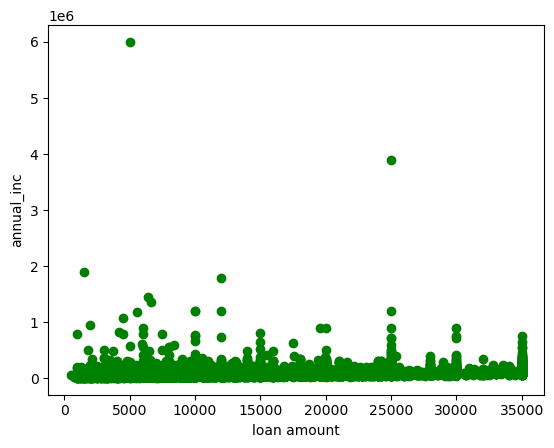

In [919]:
plt.scatter(data[data.loan_status == 'Fully Paid'].loan_amnt, data[data.loan_status == 'Fully Paid'].annual_inc, c= 'Green')
#plt.scatter(data[data.loan_status == 'Charged Off'].loan_amnt, data[data.loan_status == 'Charged Off'].annual_inc, c= 'Yellow')
#plt.scatter(data[data.loan_status == 'Current'].loan_amnt, data[data.loan_status == 'Current'].annual_inc, c= 'Cyan')
plt.xlabel("loan amount")
plt.ylabel("annual_inc")
plt.show()

In [920]:
data.last_pymnt_d.apply(lambda x: 'NA' if type(x) == float else x.split('-')[0])

1        Apr
3        Jan
4        May
5        Jan
6        May
7        Jan
9        Nov
10       Jun
11       Sep
12       Jul
13       Jan
14       Oct
15       Jan
16       Jan
17       May
18       Feb
19       Jul
20       Aug
21       Sep
22       Jan
23       Oct
24       Oct
25       Sep
27       Dec
28       Apr
29       Dec
31       Aug
32       May
33       Jan
34       Jan
35       Jan
36       Nov
37       Jan
38       Apr
39       May
40       Jan
41       Jan
43       Jan
44       Jul
45       Jan
46       Aug
47       Jan
48       Jul
49       Jan
50       Oct
51       Jan
52       Jan
53       Aug
54       Jul
55       Oct
56       Oct
57       Jul
58       Aug
59       Jan
60       Jan
62       Aug
63       Dec
64       Apr
65       Jan
66       Feb
67       Nov
68       Jun
69       Sep
70       Apr
71       Oct
72       Sep
73       Jan
74       Jan
75       Jun
76       Oct
77       Sep
78       Aug
79       Oct
80       Feb
81       Jul
82       Jan
83       Jan

In [921]:
# convert issue_d, last_pymnt_d, last_credit_pull_d  to month and year
# earliest_cr_line
data['issue_d_month'] = data.issue_d.apply(lambda x: x.split('-')[0])
data['issue_d_year'] = data.issue_d.apply(lambda x: x.split('-')[1])

data['last_pymnt_d_month'] = data.last_pymnt_d.apply(lambda x: x.split('-')[0])
data['last_pymnt_d_year'] = data.last_pymnt_d.apply(lambda x: x.split('-')[1])

data['last_credit_pull_d_month'] = data.last_pymnt_d.apply(lambda x: x.split('-')[0])
data['last_credit_pull_d_year'] = data.last_pymnt_d.apply(lambda x: x.split('-')[1])

data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
1,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.000,0,Apr-99,5,3,0,1687,9.400,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,Sep-13,0.000,Dec,11,Apr,13,Apr,13
3,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.000,0,Feb-96,1,10,0,5598,21.000,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,Apr-16,0.000,Dec,11,Jan,15,Jan,15
4,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.940,0,Jan-96,0,15,0,27783,53.900,38,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,May-16,0.000,Dec,11,May,16,May,16
5,5000,5000,5000.000,36 months,7.900,156.460,A,A4,Veolia Transportaton,3 years,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.200,0,Nov-04,3,9,0,7963,28.300,12,0.000,0.000,5632.210,5632.210,5000.000,632.210,0.000,0.000,0.000,Jan-15,161.030,Jan-16,0.000,Dec,11,Jan,15,Jan,15
6,7000,7000,7000.000,60 months,15.960,170.080,C,C5,Southern Star Photography,8 years,RENT,47004.000,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.510,0,Jul-05,1,7,0,17726,85.600,11,0.000,0.000,10110.840,10110.840,6985.610,3125.230,0.000,0.000,0.000,May-16,1313.760,May-16,0.000,Dec,11,May,16,May,16


In [922]:
# For object of anylasis we are intrested in just 2 target variables - fully_paid, charged_off. 
# Third target variable is not need and we can have 2 approach to handle it either drop all row with this value to treat it as 
# fully paid or charged off. Better approach is to drop this data as in other approach this would influence for good or worse 
# anylasis of other datapoints and might create misleading results
print(data.loan_status.value_counts())
print(data.shape)
data = data[data.loan_status != 'Current']
print(data.shape)

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64
(36433, 47)
(35367, 47)


In [923]:
# seprating columns based on their datatype for anylasis anylasis method differs based on datatype
data_c = data.select_dtypes(include='object')
print(data_c.info())
data_q = data.select_dtypes(exclude='object')
print(data_q.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   term                      35367 non-null  object
 1   grade                     35367 non-null  object
 2   sub_grade                 35367 non-null  object
 3   emp_title                 35367 non-null  object
 4   emp_length                35367 non-null  object
 5   home_ownership            35367 non-null  object
 6   verification_status       35367 non-null  object
 7   issue_d                   35367 non-null  object
 8   loan_status               35367 non-null  object
 9   purpose                   35367 non-null  object
 10  title                     35367 non-null  object
 11  zip_code                  35367 non-null  object
 12  addr_state                35367 non-null  object
 13  earliest_cr_line          35367 non-null  object
 14  last_pymnt_d          

### Checking for outliers

In [924]:
"""
Observations top possible outliers based on data spread and min/ max- 
1. annual_inc - has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 100 times
                indicates possible outlies.
2. revol_bal -  has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 16 times
                indicates possible outlies.
3. total_pymnt -    has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 5 times
                indicates possible outlies.         
                
"""
data_q.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,35367.000,11133.072,7326.233,500.000,5500.000,10000.000,15000.000,35000.000
funded_amnt,35367.000,10866.526,7069.586,500.000,5500.000,9600.000,15000.000,35000.000
funded_amnt_inv,35367.000,10427.124,6968.342,0.000,5000.000,9000.000,14300.000,35000.000
int_rate,35367.000,11.983,3.703,5.420,8.940,11.830,14.460,24.400
installment,35367.000,324.044,207.149,16.080,167.840,280.620,426.640,1305.190
annual_inc,35367.000,69095.985,63967.047,4000.000,41500.000,60000.000,82500.000,6000000.000
dti,35367.000,13.404,6.637,0.000,8.320,13.500,18.640,29.990
delinq_2yrs,35367.000,0.146,0.493,0.000,0.000,0.000,0.000,11.000
inq_last_6mths,35367.000,0.867,1.064,0.000,0.000,1.000,1.000,8.000
open_acc,35367.000,9.332,4.375,2.000,6.000,9.000,12.000,44.000


count     35367.000
mean      69095.985
std       63967.047
min        4000.000
25%       41500.000
50%       60000.000
75%       82500.000
max     6000000.000
Name: annual_inc, dtype: float64


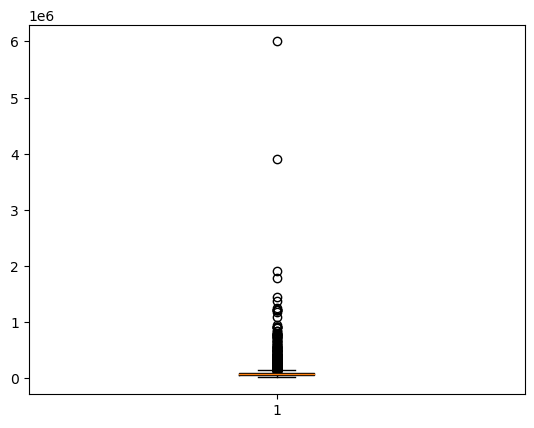

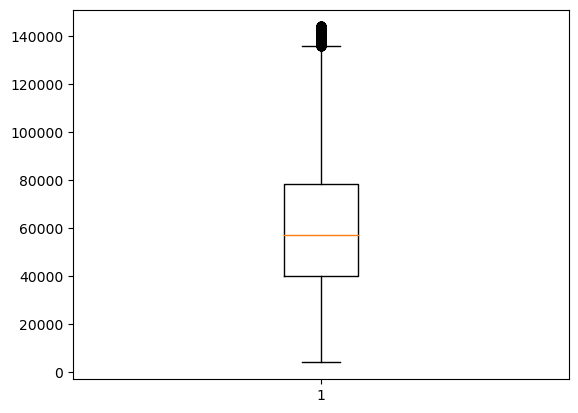

In [925]:
# Observation - distribution is mostly continous till 1.5 1e6 after that distribution is breaking - data seems sensible as 
# there are very few people with very high income but these datapoint would help much in current anylasis hence dropping them as 
# outliers Using 1.5IQR rule to detect and remove outliers.
print(data.annual_inc.describe())

plt.boxplot(data.annual_inc)
plt.show()
# print(data.annual_inc.quantile([0.75]).to_list()[0])
annual_inc_iqr = data.annual_inc.quantile([0.75]).to_list()[0] - data.annual_inc.quantile([0.25]).to_list()[0]
annual_inc_lower_bound = data.annual_inc.quantile([0.25]).to_list()[0] - (1.5 * annual_inc_iqr) # Q1 - 1.5 * IQR
annual_inc_upper_bound = data.annual_inc.quantile([0.75]).to_list()[0] + (1.5 * annual_inc_iqr) # Q3 - 1.5 * IQR

data = data[(data.annual_inc >= annual_inc_lower_bound) & (data.annual_inc <= annual_inc_upper_bound)]
data_q = data_q[(data_q.annual_inc >= annual_inc_lower_bound) & (data_q.annual_inc <= annual_inc_upper_bound)]

plt.boxplot(data.annual_inc)
plt.show()

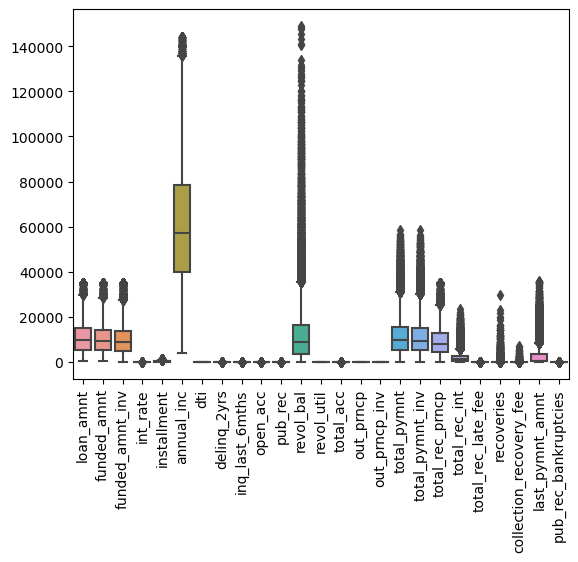

In [926]:
# Looking at data distribution for other quantitive scale of some variables if dominating others
sns.boxplot(data_q)
plt.xticks(rotation = 90)
plt.show()

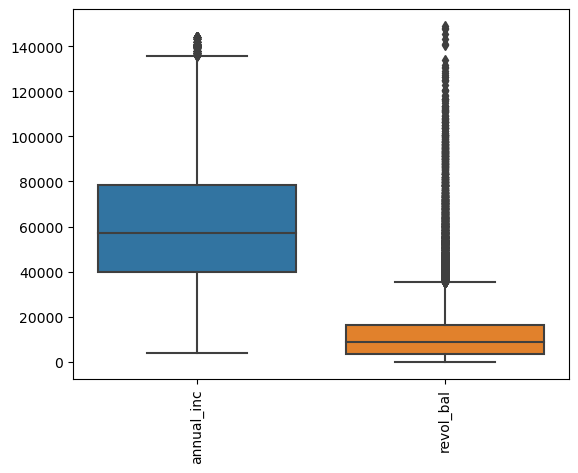

In [927]:
# data is roughly continous so skipping outlier removal
sns.boxplot(data_q[['annual_inc', 'revol_bal']])
plt.xticks(rotation = 90)
plt.show()

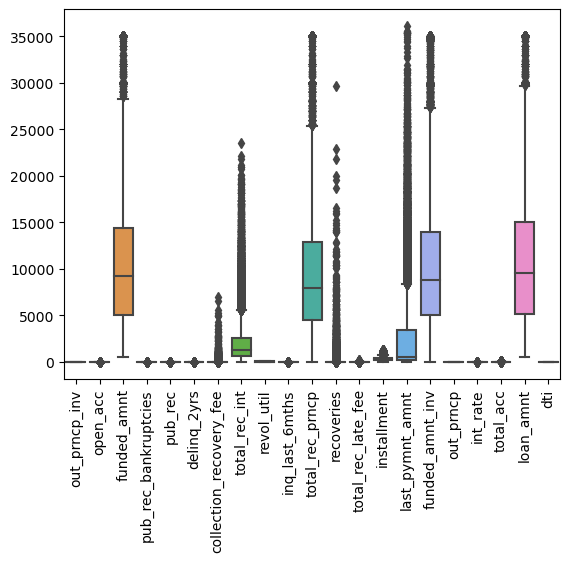

In [928]:
# data is roughly continous so skipping outlier removal except for column recoveries
sns.boxplot(data_q[list(set(data_q.columns.to_list()) - set(['annual_inc', 'revol_bal', 'total_pymnt', 'total_pymnt_inv']))])
plt.xticks(rotation = 90)
plt.show()

0.250      0.000
0.500      0.000
0.750      0.000
0.850      0.000
0.900     13.572
0.950    361.731
0.990   1912.759
Name: recoveries, dtype: float64


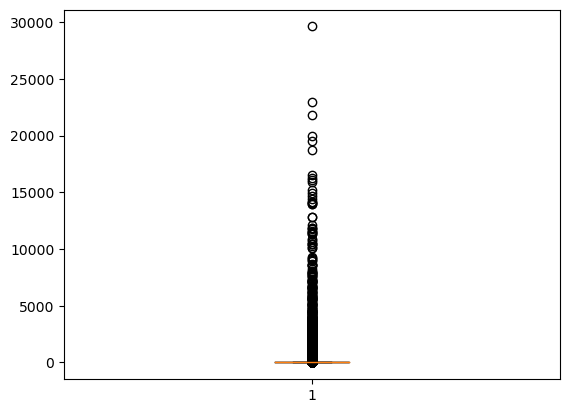

In [929]:
# removing outliers from recoveries
print(data.recoveries.quantile([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]))

plt.boxplot(data.recoveries)
plt.show()

# data distribution is very skwed(85% of the values are 0) appliying 1.5IQR would drop all data hence skipping outlier removal here as well

In [930]:
print(data_c.nunique())
# dropping columns which are not relevant to anylasis also dropping columns for which we have created derived metrics - issue_d, last_pymnt_d, last_credit_pull_d 
data_c = data_c.drop(['emp_title', 'title', 'zip_code', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'issue_d'], axis = 1)
print(data_c.nunique())

term                            2
grade                           7
sub_grade                      35
emp_title                   27414
emp_length                     11
home_ownership                  4
verification_status             3
issue_d                        52
loan_status                     2
purpose                        14
title                       17662
zip_code                      805
addr_state                     49
earliest_cr_line              509
last_pymnt_d                   97
last_credit_pull_d             96
issue_d_month                  12
issue_d_year                    5
last_pymnt_d_month             12
last_pymnt_d_year               9
last_credit_pull_d_month       12
last_credit_pull_d_year         9
dtype: int64
term                         2
grade                        7
sub_grade                   35
emp_length                  11
home_ownership               4
verification_status          3
loan_status                  2
purpose               

In [931]:
print(len(data_c.nunique()))

15


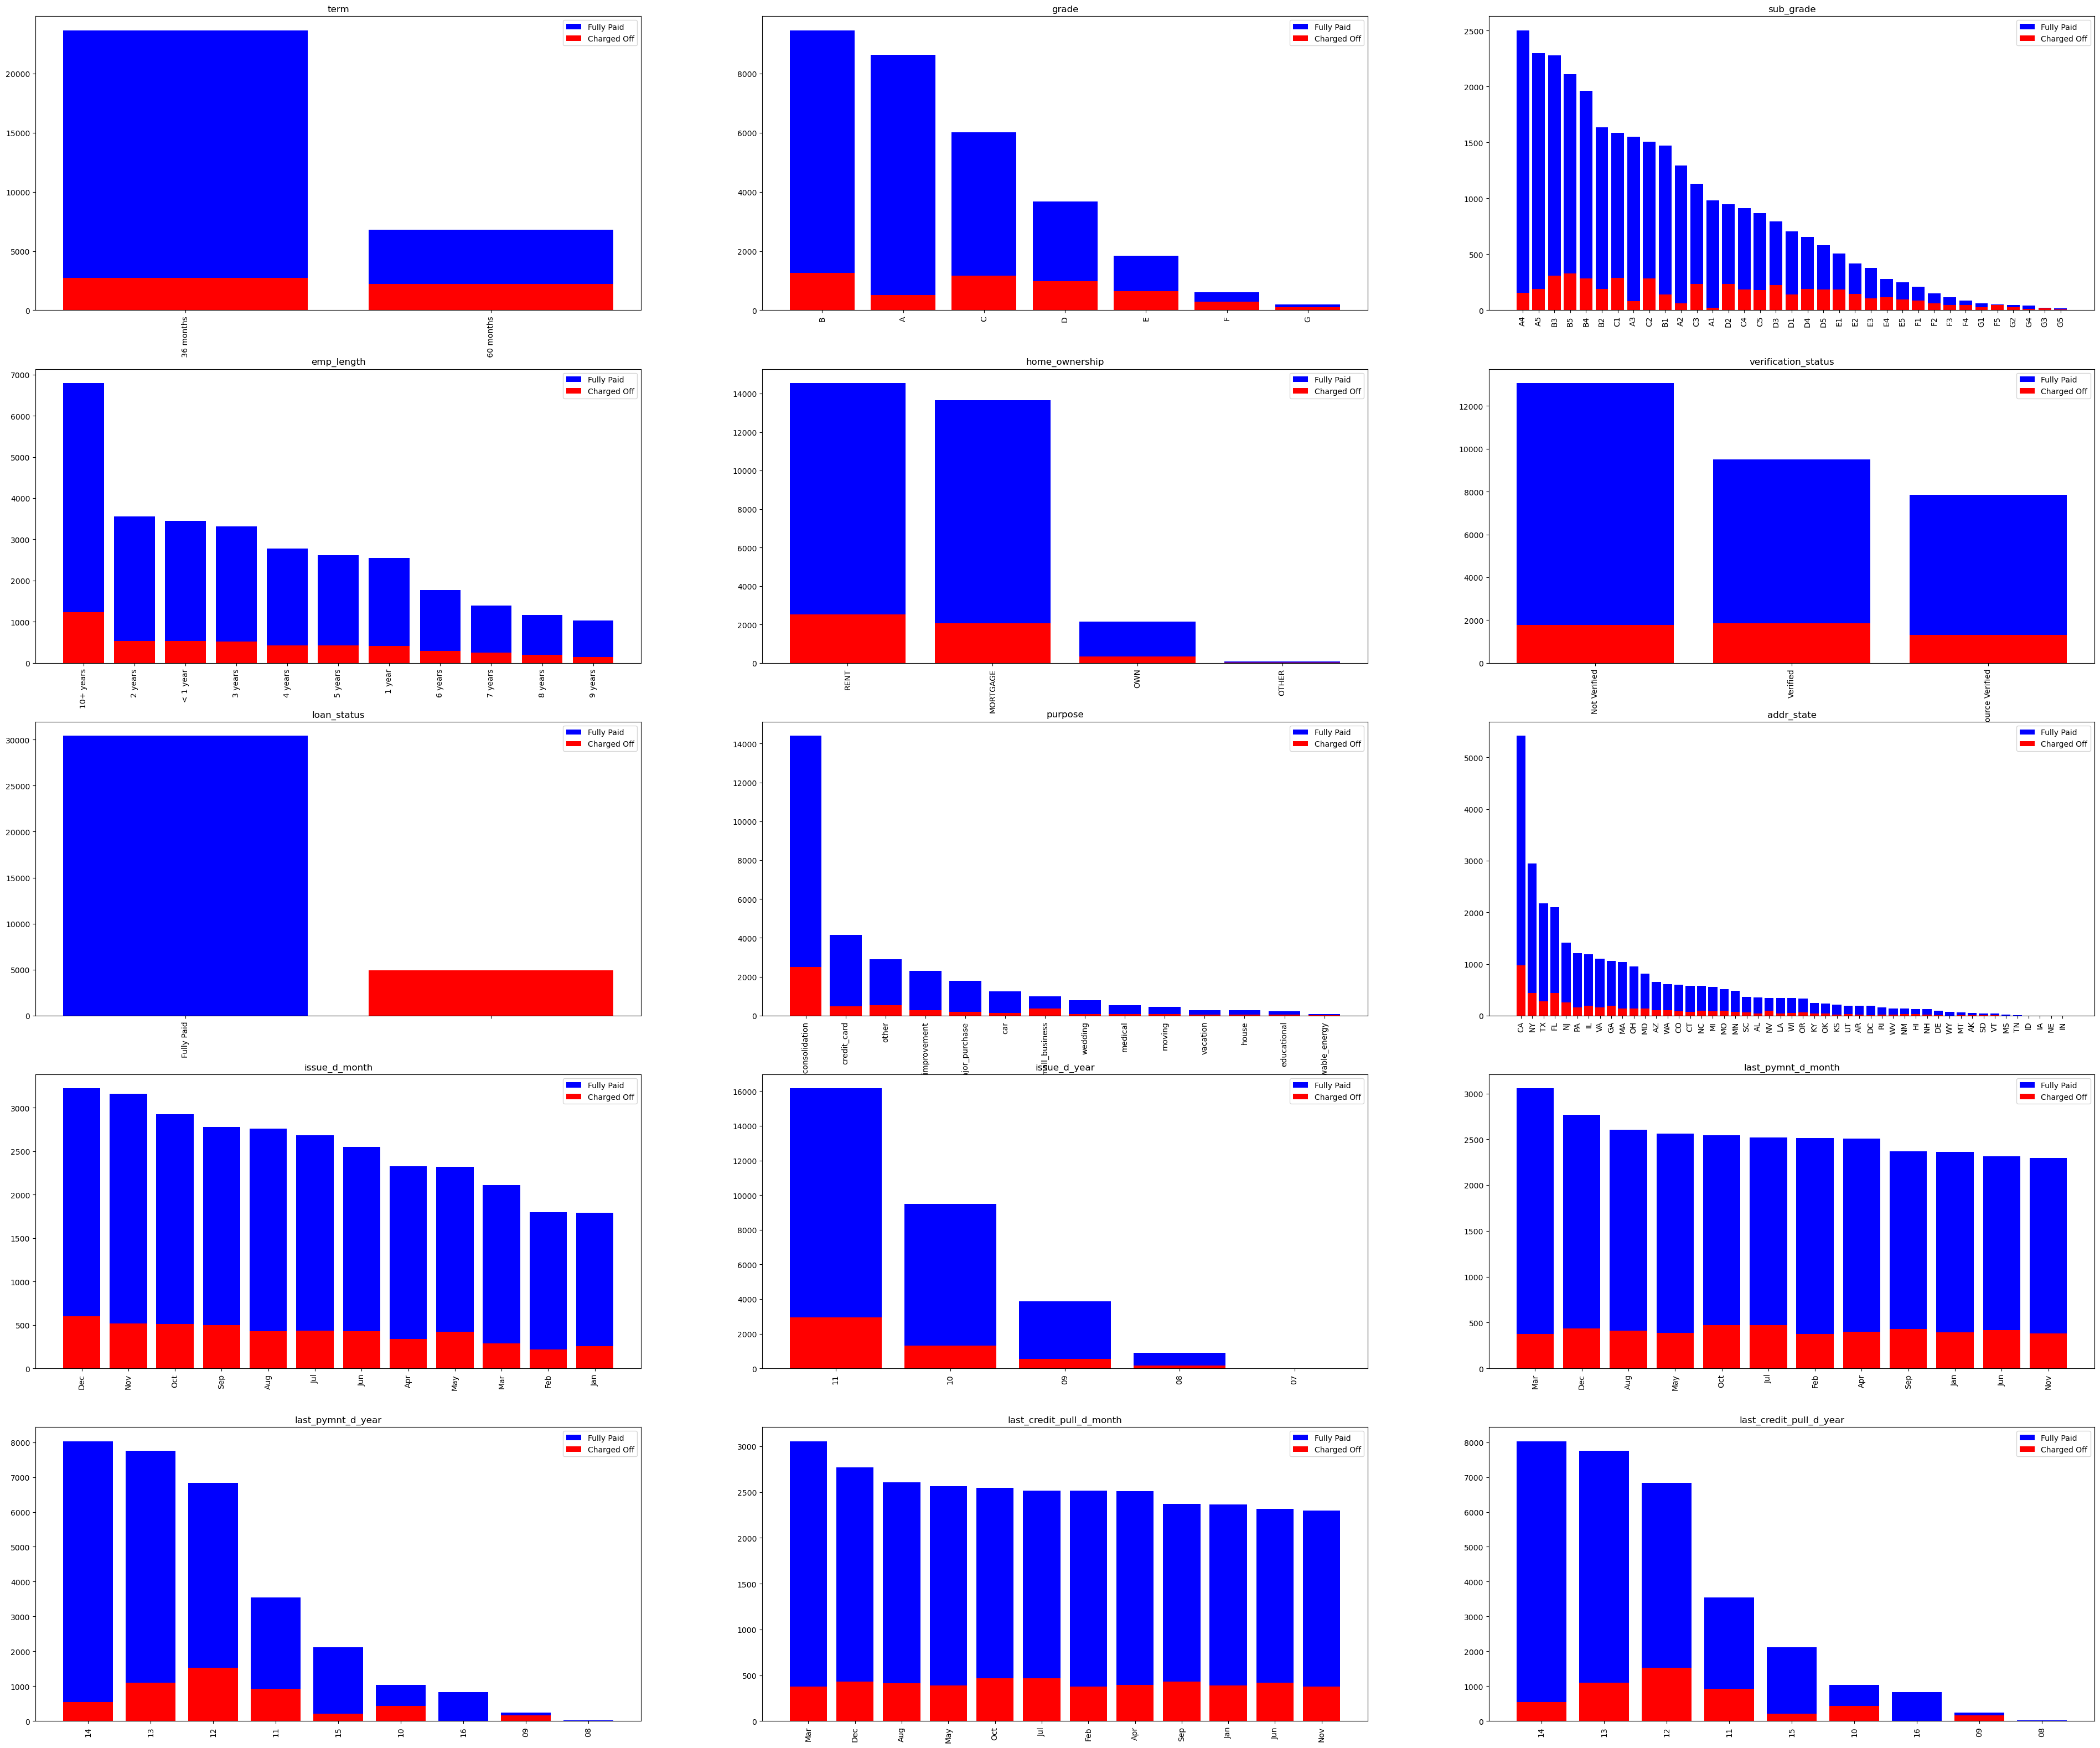

In [936]:
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(48, 40))
ind = 0
data_features = data_c.columns.to_list()

for i in range(5):
    for j in range(3):
        fp = ax[i][j].bar(data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().index.to_list(), data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().values, color='blue')
        df = ax[i][j].bar(data_c[data_c['loan_status'] == 'Charged Off'][data_features[ind]].value_counts().index.to_list(), data_c[data_c['loan_status'] == 'Charged Off'][data_features[ind]].value_counts().values, color='red')
        ax[i][j].legend((fp, df), ('Fully Paid', 'Charged Off'))
        ax[i][j].set_title(data_features[ind])
        ax[i][j].set_xticklabels(data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().index.to_list(), rotation = 90)
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.show()

# Observations

1. **term** - 60 months loans have greater probablity(15% more) of default as compared to 36 month loans
2. **grade, sub_grade** - (assigning a quality score to a loan based on a borrower's credit history) here by implicit load grade represent probablity of loan not defalting. Data also reflects the same probablity of default is in descending order starting from A to E and 1 to 5
3. **emp_length** - there is no significant difference in default rate across this feature. Default rate ranges from 12 to 15 percent
4. **home_ownership** - There is no significant difference in MORGAGE, RENT and OWN type ownership. In terms of probablity OTHER type has highest default rate but there are significantly less data points in this category as compared to other hence it is not conclusive.
5. **verification_status** - Here suprisingly loans which are verified have highest default changes(16.7%) and loans which are not verified have lowest default changes(12.9%). Source Verified is in between.
6. **purpose** - majority of the loans are given under debt_consolidation purpose. Category with most default is small_buisness(26%) followed by renewable_energy which is 17%. 
7. **addr_state** - Addr State is following power law distribution. NV has max default rate
8. **issue_d** - Max no of loans are funded towards end of year(Q3) which may be to holiday season and people buying new things. There is not significant variance in default rate across months. Default rate is ranging from 12% to 15%
9. **issue_d_year** - Distribution is almost power law. Max no of loans are given in year 11 and min no of loans were given out in year 07 with max default rate of 33%.

In [941]:
ind = 0
data_features = data_c.columns.to_list()

for i in range(5):
    for j in range(3): 
        print(percentage_data + '\n' + str(100 * (data.groupby(by=[data_features[ind], 'loan_status'])['loan_status'].count())/(data.groupby(by=[data_features[ind]])['loan_status'].count())))
        print('-----' * 10)
        ind = ind+1
        if ind >= len(data_features):
            break


term        loan_status
 36 months  Charged Off   10.451
            Fully Paid    89.549
 60 months  Charged Off   25.082
            Fully Paid    74.918
Name: loan_status, dtype: float64
grade  loan_status
A      Charged Off    5.737
       Fully Paid    94.263
B      Charged Off   11.852
       Fully Paid    88.148
C      Charged Off   16.744
       Fully Paid    83.256
D      Charged Off   21.348
       Fully Paid    78.652
E      Charged Off   26.205
       Fully Paid    73.795
F      Charged Off   31.835
       Fully Paid    68.165
G      Charged Off   35.341
       Fully Paid    64.659
Name: loan_status, dtype: float64
sub_grade  loan_status
A1         Charged Off    2.371
           Fully Paid    97.629
A2         Charged Off    4.805
           Fully Paid    95.195
A3         Charged Off    5.060
           Fully Paid    94.940
A4         Charged Off    5.972
           Fully Paid    94.028
A5         Charged Off    7.805
           Fully Paid    92.195
B1         Charged Of

In [955]:
data_q.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,33747.000,10801.040,7057.313,500.000,5200.000,9600.000,15000.000,35000.000
funded_amnt,33747.000,10550.100,6810.850,500.000,5100.000,9250.000,14400.000,35000.000
funded_amnt_inv,33747.000,10126.591,6712.121,0.000,5000.000,8800.000,13950.000,35000.000
int_rate,33747.000,11.938,3.679,5.420,8.940,11.830,14.420,24.400
installment,33747.000,314.528,198.928,16.080,165.380,273.840,411.615,1305.190
annual_inc,33747.000,61719.147,27763.774,4000.000,40000.000,57000.000,78281.170,144000.000
dti,33747.000,13.563,6.626,0.000,8.510,13.710,18.810,29.990
delinq_2yrs,33747.000,0.145,0.490,0.000,0.000,0.000,0.000,11.000
inq_last_6mths,33747.000,0.860,1.059,0.000,0.000,1.000,1.000,8.000
open_acc,33747.000,9.229,4.327,2.000,6.000,9.000,12.000,44.000


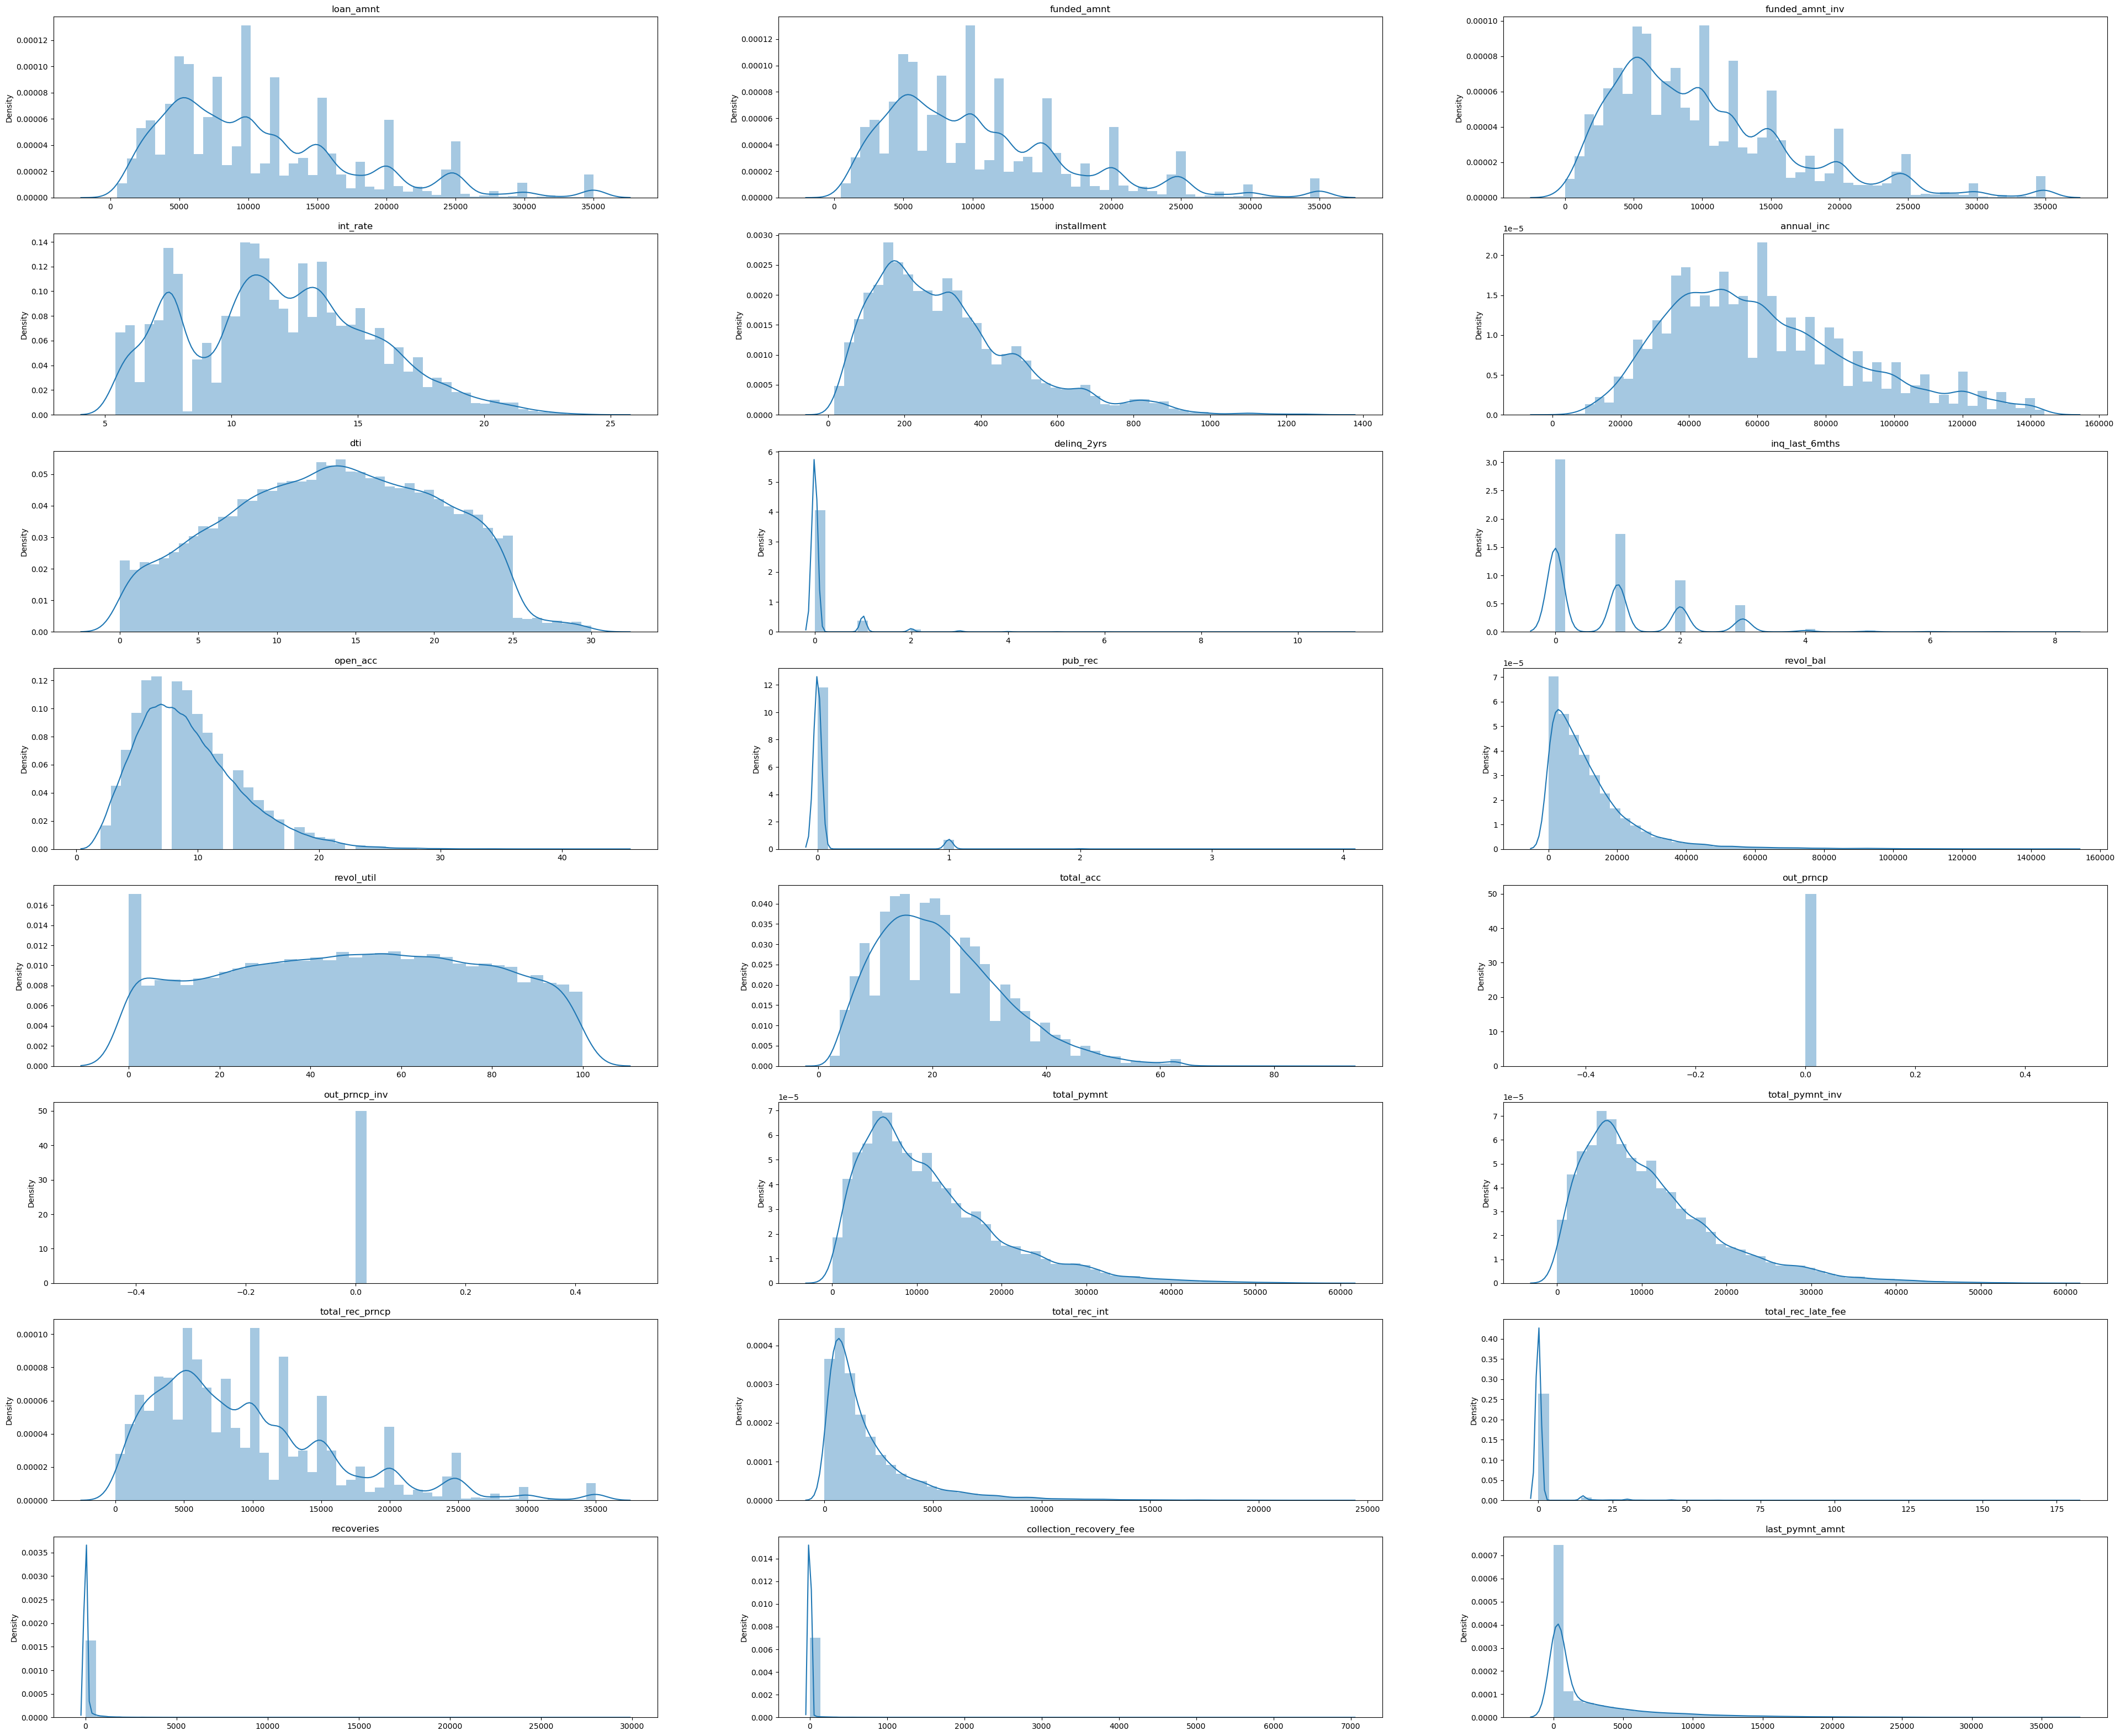

In [954]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(48, 40))
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        sns.distplot(ax = ax[i][j], x = data_q[data_features[ind]])
        ax[i][j].set_title(data_features[ind])
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.show()

# sns.distplot(data_q.loan_amnt)
# plt.show()

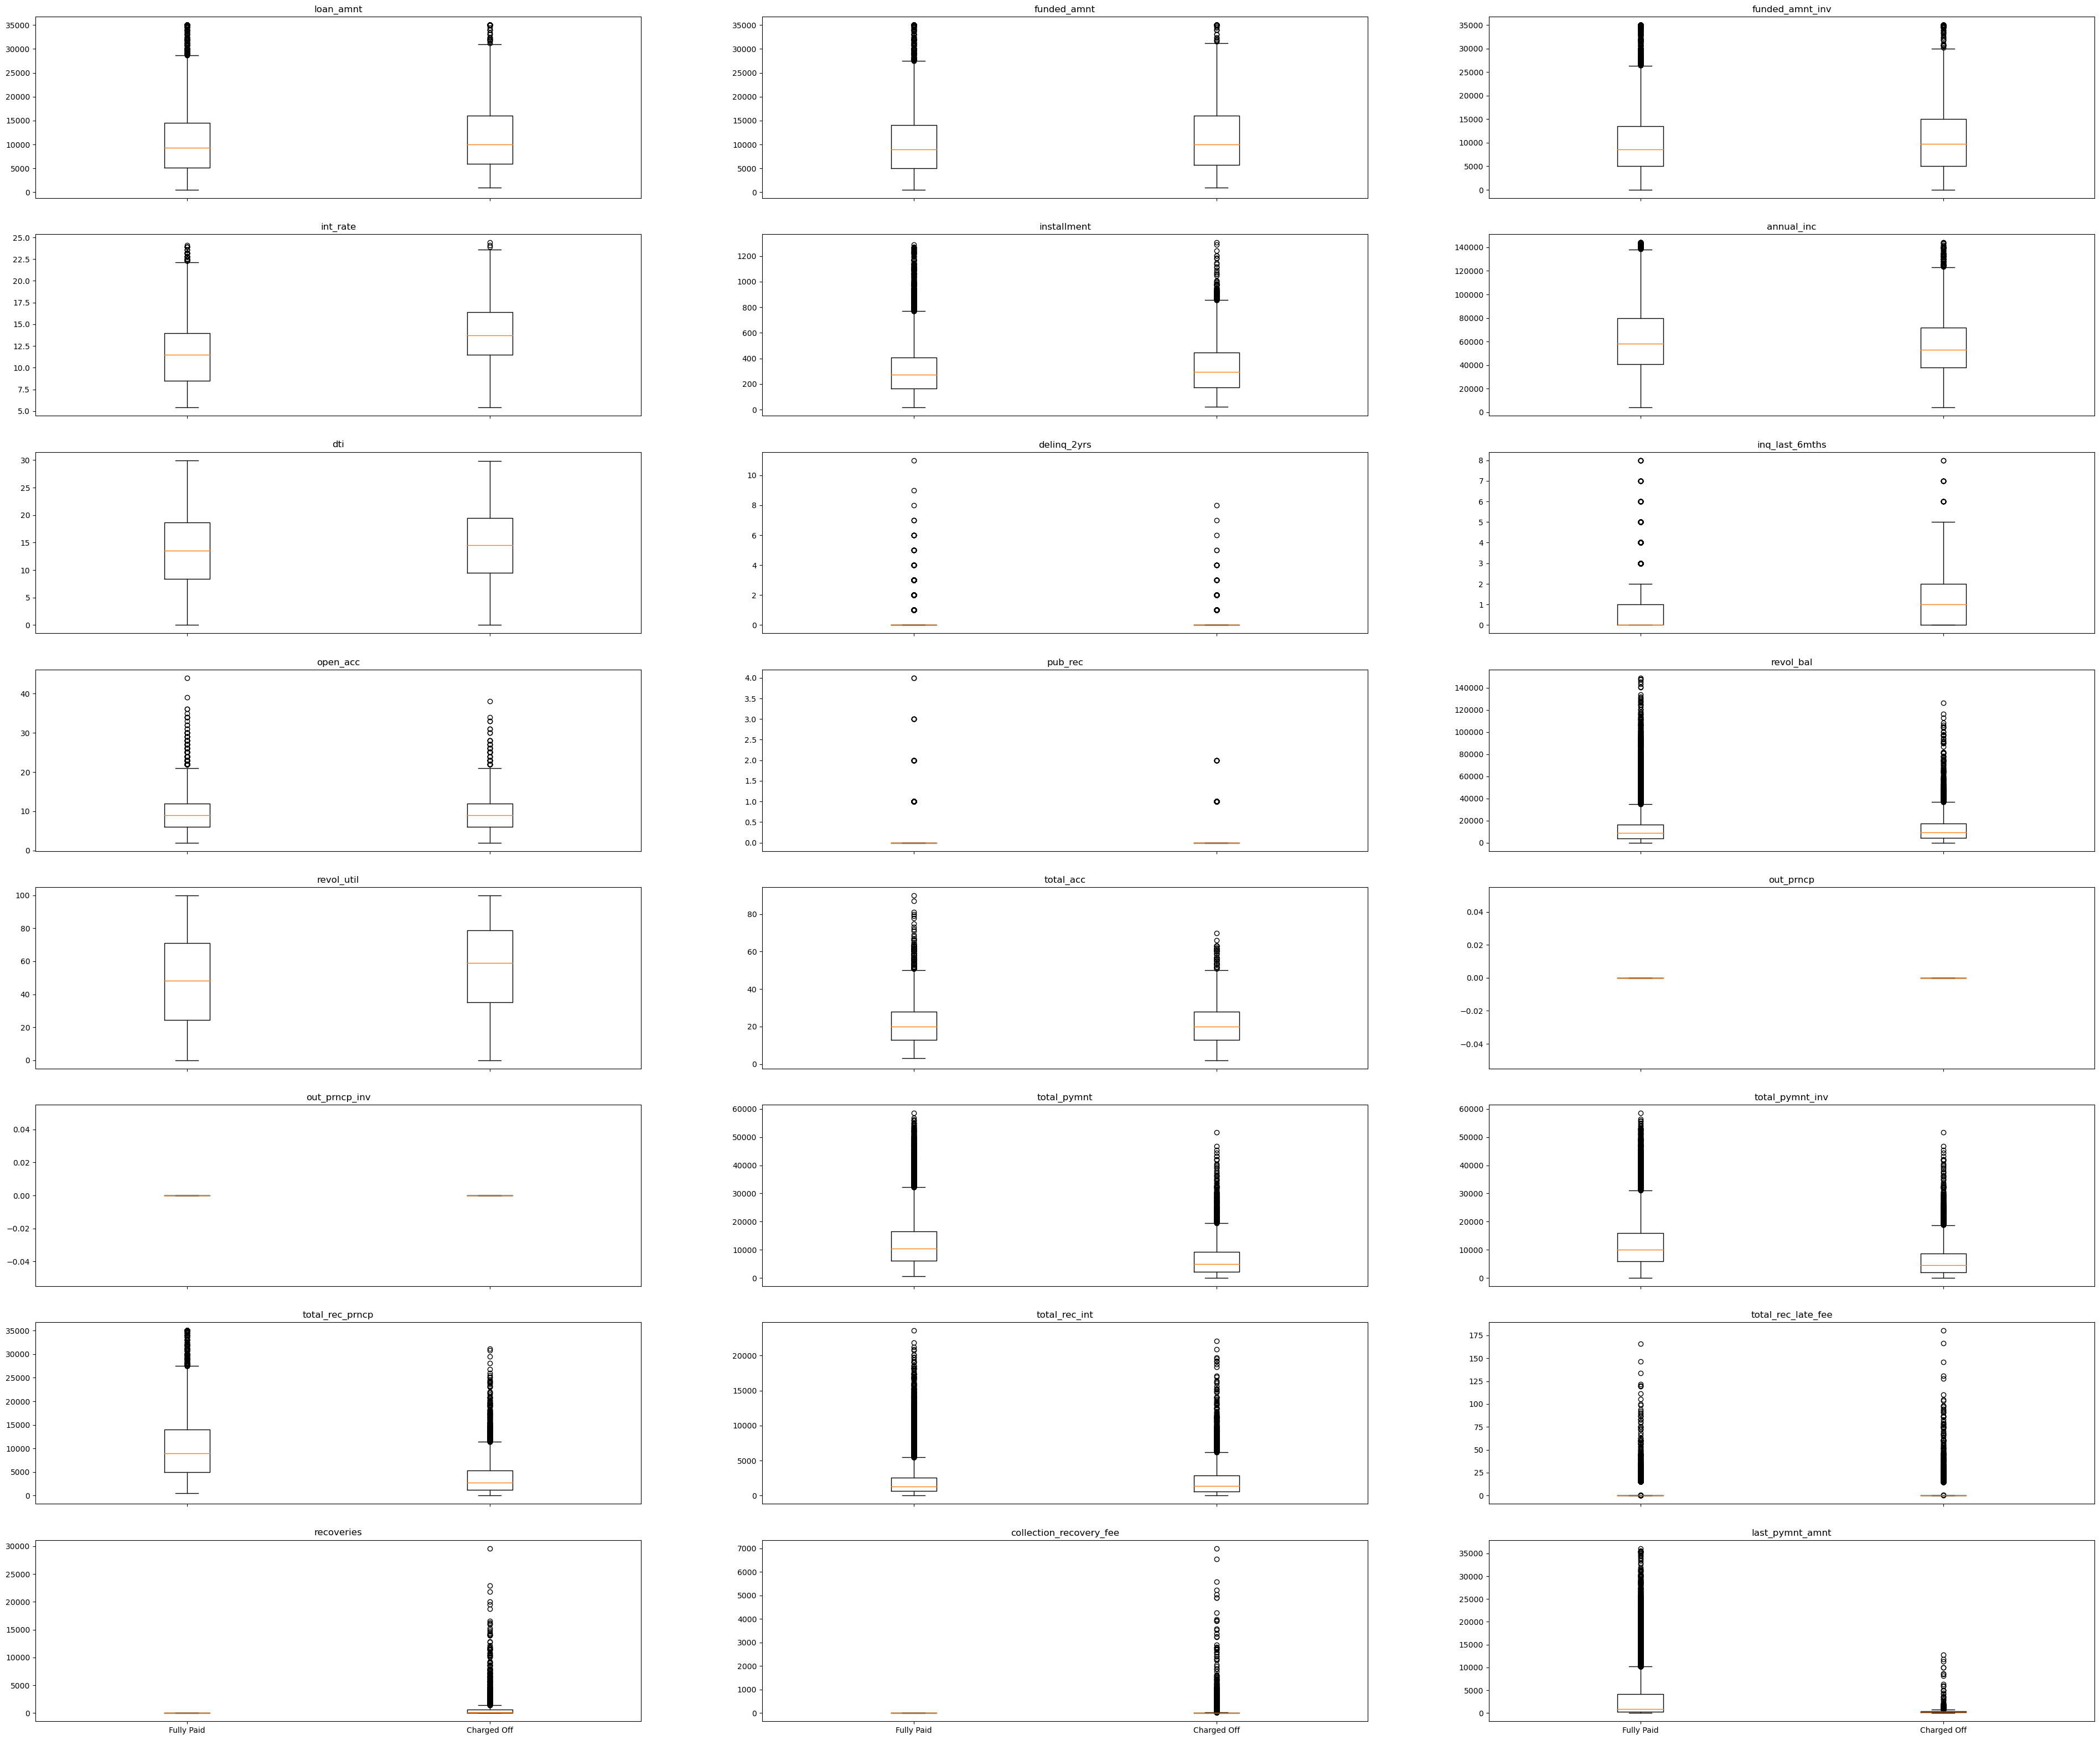

In [969]:
# use box plot to explore relation between continous variable and categorical variable
# segmented univariate anylasis
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(48, 40), sharex = True)
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        ax[i][j].boxplot([data[data['loan_status'] == 'Fully Paid'][data_features[ind]], data[data['loan_status'] == 'Charged Off'][data_features[ind]]])
        ax[i][j].set_title(data_features[ind])
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.xticks((1,2),["Fully Paid", "Charged Off"])            
plt.show()

# plt.boxplot([data[data['loan_status'] == 'Fully Paid'].loan_amnt, data[data['loan_status'] == 'Charged Off'].loan_amnt])
# plt.xticks((1,2),["Fully Paid", "Charged Off"])
# plt.show()

# Bi-Variate Anylasis



In [946]:
data_q.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000,0.982,0.952,0.290,0.930,0.394,0.089,-0.042,-0.000,0.163,-0.041,0.317,0.072,0.239,NaN,NaN,0.880,0.856,0.843,0.727,0.044,0.145,0.078,0.472,-0.024
funded_amnt,0.982,1.000,0.971,0.296,0.956,0.390,0.089,-0.042,0.001,0.161,-0.041,0.309,0.077,0.234,NaN,NaN,0.897,0.873,0.861,0.736,0.046,0.147,0.080,0.477,-0.026
funded_amnt_inv,0.952,0.971,1.000,0.287,0.922,0.377,0.092,-0.045,-0.010,0.152,-0.046,0.293,0.079,0.225,NaN,NaN,0.883,0.905,0.846,0.729,0.033,0.139,0.070,0.470,-0.031
int_rate,0.290,0.296,0.287,1.000,0.267,0.047,0.112,0.156,0.135,-0.004,0.105,0.085,0.469,-0.063,NaN,NaN,0.283,0.275,0.165,0.519,0.097,0.130,0.074,0.167,0.088
installment,0.930,0.956,0.922,0.267,1.000,0.388,0.079,-0.031,-0.001,0.159,-0.037,0.311,0.105,0.213,NaN,NaN,0.857,0.829,0.846,0.640,0.053,0.122,0.076,0.411,-0.023
annual_inc,0.394,0.390,0.377,0.047,0.388,1.000,-0.081,0.029,0.032,0.261,-0.003,0.403,0.044,0.388,NaN,NaN,0.374,0.363,0.375,0.266,0.005,0.040,0.020,0.218,0.001
dti,0.089,0.089,0.092,0.112,0.079,-0.081,1.000,-0.034,0.009,0.301,-0.008,0.269,0.277,0.244,NaN,NaN,0.085,0.087,0.062,0.122,-0.009,0.027,0.011,0.021,0.005
delinq_2yrs,-0.042,-0.042,-0.045,0.156,-0.031,0.029,-0.034,1.000,0.008,0.013,0.012,-0.062,-0.042,0.066,NaN,NaN,-0.033,-0.037,-0.047,0.015,0.028,0.010,0.012,-0.015,0.007
inq_last_6mths,-0.000,0.001,-0.010,0.135,-0.001,0.032,0.009,0.008,1.000,0.093,0.026,-0.026,-0.066,0.112,NaN,NaN,-0.019,-0.026,-0.032,0.021,0.034,0.017,0.011,0.023,0.016
open_acc,0.163,0.161,0.152,-0.004,0.159,0.261,0.301,0.013,0.093,1.000,0.009,0.286,-0.094,0.681,NaN,NaN,0.145,0.138,0.143,0.108,-0.017,0.021,0.010,0.074,0.015


In [ ]:
# binning continous variable and plotting against categorical

In [961]:
data.loan_status.value_counts()

Fully Paid     28977
Charged Off     4770
Name: loan_status, dtype: int64

In [780]:
# percent of loan defaults by grade
100 * (data.groupby(by=['grade', 'loan_status'])['loan_status'].count())/(data.groupby(by=['grade'])['loan_status'].count())

grade  loan_status
A      Charged Off    5.737
       Fully Paid    94.263
B      Charged Off   11.852
       Fully Paid    88.148
C      Charged Off   16.744
       Fully Paid    83.256
D      Charged Off   21.348
       Fully Paid    78.652
E      Charged Off   26.205
       Fully Paid    73.795
F      Charged Off   31.835
       Fully Paid    68.165
G      Charged Off   35.341
       Fully Paid    64.659
Name: loan_status, dtype: float64

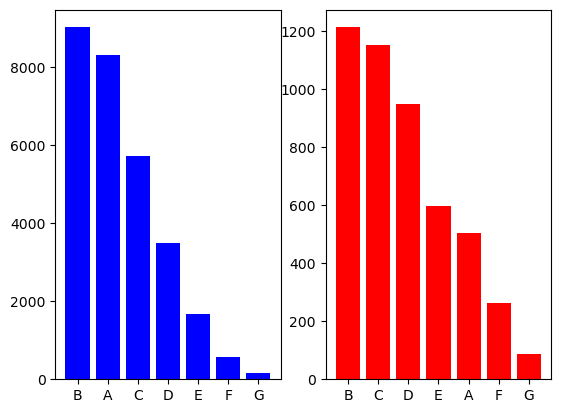

In [781]:
# loan defaults and paid offs by numbers
grade_nd = data[data.loan_status == 'Fully Paid'].grade
grade_d = data[data.loan_status == 'Charged Off'].grade
plt.subplot(1,2,1)
plt.bar(grade_nd.value_counts().index, grade_nd.value_counts().values, color = 'blue')

plt.subplot(1,2,2)
plt.bar(grade_d.value_counts().index, grade_d.value_counts().values, color = 'red')
plt.show()

In [450]:
# derived cols
# persion income-m/a and loan install -> debt percent(column)

### data cleaning and manipulation

Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

 

If applicable, data is converted to a suitable and convenient format to work with using the right methods.

 

 

Manipulation of strings and dates is done correctly wherever required.

### data anylasis

The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.

 

 

Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

 

Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis. The explanation for creating the derived metrics is mentioned and is reasonable.

 

Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense. 

 

The most useful insights are explained correctly in the comments.
 

 

Appropriate plots are created to present the results of the analysis. The choice of plots for respective cases is correct. The plots should clearly present the relevant insights and should be easy to read. The axes and important data points are labelled correctly.

#### type drive metrics

Steven’s typology classifies variables into four types — nominal, ordinal, interval and ratio:

    Nominal variables: Categorical variables, where the categories differ only by their names; there is no order among categories, e.g. colour (red, blue, green), gender (male, female), department (HR, analytics, sales)

        These are the most basic form of categorical variables

    Ordinal variables: Categories follow a certain order, but the mathematical difference between categories is not meaningful, e.g. education level (primary school, high school, college), height (high, medium, low), performance (bad, good, excellent), etc.

        Ordinal variables are nominal as well

    Interval variables: Categories follow a certain order, and the mathematical difference between categories is meaningful but division or multiplication is not, e.g. temperature in degrees celsius ( the difference between 40 and 30 degrees C is meaningful, but 30 degrees x 40 degrees is not), dates (the difference between two dates is the number of days between them, but 25th May / 5th June is meaningless), etc.

        Interval variables are both nominal and ordinal

    Ratio variables: Apart from the mathematical difference, the ratio (division/multiplication) is possible, e.g. sales in dollars ($100 is twice $50), marks of students (50 is half of 100), etc.

        Ratio variables are nominal, ordinal and interval type
        

#### data driven

data-driven metrics can be created based on the variables present in the existing data set. For example, if you have two variables in your data set such as "weight" and "height" which shows a high correlation. So, instead of analysing "weight" and "height" variables separately, you can think of deriving a new metric "Body Mass Index (BMI)". Once you get the BMI, you can easily categorise people based on their fitness, e.g. a BMI below 18.5 should be considered as an underweight category, while BMI above 30.0 is considered as obese, by standard norms. This is how data-driven metrics can help you discover hidden patterns out of the data.


##### buisness driven


        

In [231]:
data.corr()

C:\Users\91932\AppData\Local\Temp\ipykernel_15624\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,0.310392,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
int_rate,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,0.010395,0.097208,0.097100,-0.043570,0.134616,0.134668,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.082550
installment,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,0.312679,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,0.279961,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,0.228743,0.229881,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,-0.055125,0.067892,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,0.009229,0.009259,-0.005712,0.133013,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,-0.022381,0.111499,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346
open_acc,0.177168,0.175530,0.163027,0.010395,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,0.288964,0.686635,0.028688,0.028514,0.162663,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,0.005930


In [232]:
# way to identify which categorical variables are important

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [346]:
#data[['funded_amnt', 'funded_amnt_inv']].head(30)
data.corr()['funded_amnt']

C:\Users\91932\AppData\Local\Temp\ipykernel_15624\1344632754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['funded_amnt']


loan_amnt                  0.981578
funded_amnt                1.000000
funded_amnt_inv            0.958422
int_rate                   0.312619
installment                0.956159
annual_inc                 0.266965
dti                        0.066283
delinq_2yrs               -0.032355
inq_last_6mths             0.009259
open_acc                   0.175530
pub_rec                   -0.052169
revol_bal                  0.310392
total_acc                  0.250589
out_prncp                  0.194941
out_prncp_inv              0.194675
total_pymnt                0.903160
total_pymnt_inv            0.870799
total_rec_prncp            0.870255
total_rec_int              0.737469
total_rec_late_fee         0.046705
recoveries                 0.136284
collection_recovery_fee    0.074676
last_pymnt_amnt            0.453133
pub_rec_bankruptcies      -0.038502
Name: funded_amnt, dtype: float64

In [347]:
data.grade.head()

0    B
1    C
2    C
3    C
4    B
Name: grade, dtype: object

In [351]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,11,Jan,15,Jan,15
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,11,Apr,13,Apr,13
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,11,Jun,14,Jun,14
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,11,Jan,15,Jan,15
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,11,May,16,May,16


debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

# Univariate anylasis
```
Feature Type
    1. Continous
        -> Histogram
        -> Stastical Descriptions (Mean, Median min and max etc)
        -> Box Plots (detect outliers)
    2. Categorical
        -> Un-Ordered Categorical Variables
            -> Rank Frequency Distribution
            -> Bar Chart
            -> Pie Chart
        -> Ordered Categorical Variables
            -> Histograms
            -> Bar chart
```     
Segmented univariate anylasis  